# Human Detection using HOG Feature and SVM Classifier

- Algorithm Detail : https://learnopencv.com/histogram-of-oriented-gradients/
- Lecture : http://www.cs.utoronto.ca/~fidler/slides/CSC420/lecture17.pdf

## Paramter Tuning / Hyperparameter Tuning<br>

- Parameter Tuning also known as Hyperparameter tuning is a crucial step in machine learning and other computational models where you try to find the best configuration of hyperparameters for a given algorithm or a model.<br><br>

- Hyperparameters are settings that are not learned during the training process but need to be specified beforehand. They control the behavior of the learning algorithm and can significantly impact the model's performance.<br><br>

- The process of parameter tuning involves exploring different combinations of hyperparameter values to identify the configuration that results in the best performance for your specific task. The goal is to find hyperparameter values that generalize well to unseen data and lead to a model with optimal predictive capabilities.<br><br>

Examples of hyperparameters in various algorithms include:
- learning rate, 
- number of hidden layers, 
- nunmber of neurons per layer in a neural network,
- the regularization strength, 
- the depth of a decision tree, 
- etc.

Hyperparameter tuning is typically done through trial and error using automated techniques like:
- grid search,
- random search,
- Bayesain optimization

The idea is to evaluate the model's performance on a validation set for each hyperparameter combination and then select the one that yields the best results.

The importance of parameter tuning lies in the fact that different hyperparameter values can lead to dramatically different model performance. Finding the right combination can significantly improve your model's accuracy, generalization, and ability to handle complex data patterns.

Some studies states that there is a difference between "Hyperparameters

In [1]:
from skimage.feature import hog
#from skimage.io import imread
import joblib,glob,os,cv2

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

### HOG Features

In [2]:
def feature_extract(img):
  fd = cv2.resize(img,(64,128))
  fd,hog_image = hog(fd,orientations=9,pixels_per_cell=(8,8),visualize=True,cells_per_block=(3,3))
  return hog_image

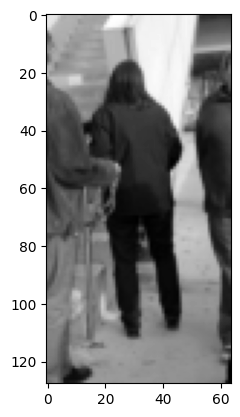

In [3]:
img = cv2.imread("../Datasets/DATAIMAGE/positive/person_341d.png",0)
plt.imshow(img,cmap='gray')

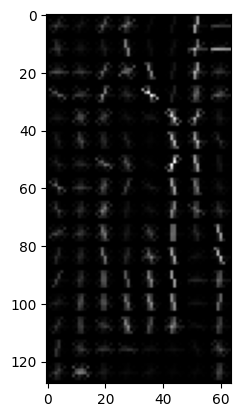

In [4]:
result = feature_extract(img)
plt.imshow(result,cmap='gray')

### Data Preparation

In [5]:
X = []
Y = []

pos_im_path = '../Datasets/DATAIMAGE/positive/'
neg_im_path = '../Datasets/DATAIMAGE/negative/'

# Load the positive features
for filename in glob.glob(os.path.join(pos_im_path, "*.png")):
    fd = cv2.imread(filename, 0)
    fd = cv2.resize(fd, (64, 128))
    fd = hog(fd, orientations=9, pixels_per_cell=(8, 8), visualize=False, cells_per_block=(3, 3))
    X.append(fd)
    Y.append(1)

# Load the negative features
for filename in glob.glob(os.path.join(neg_im_path, "*.jpg")):
    fd = cv2.imread(filename, 0)
    fd = cv2.resize(fd, (64, 128))
    fd = hog(fd, orientations=9, pixels_per_cell=(8, 8), visualize=False, cells_per_block=(3, 3))
    X.append(fd)
    Y.append(0)

# Convert the lists to NumPy arrays for further processing
X = np.array(X, dtype=np.float32)
Y = np.array(Y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print('Train Data:', len(X_train))
print('Train Labels (1,0):', len(y_train))


Train Data: 4520
Train Labels (1,0): 4520


### Model Training

In [6]:
model = LinearSVC()
model.fit(X_train,y_train)

/home/htootayzaaung/anaconda3/envs/ai/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9212389380530973
Precision: 0.9092783505154639
Recall: 0.9074074074074074
F1-score: 0.9083419155509785
Confusion Matrix:
 [[600  44]
 [ 45 441]]


## Performance metrics

- <b>Accuracy:</b> Accuracy is the most straightforward performance metric. It calculates the percentage of correct predictions out of all predictions. In your case, the accuracy is approximately 91.06% which means that about 91.06% of the predictions made by the model is correct.
<br>
- <b>Precision:</b> Precision is the ratio of true postive predictions to the total positive predictions <b>(true_positive_predictions / total_postive_predictions)</b>. It measures the model's ability to identify postive samples. In your case, the precision is approximately 89.71% which means that when the model predicts a sample as postive (human), it is correct about 89.71% of the time.
<br>
- <b>Recall:</b> Recall (also known as sensitivity or true positive rate) is the ratio of true positive predictions to the total actual positive samples <b>(true_positive_predictions / total_postive_predictions)</b>. It measures the model's ability to correctly identify all positive samples. In your case, the recall is approximately 89.53% which means that the model correctly identifies about 89.53% of the actual postive samples.
<br>
- <b>F1-score:</b> The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when we want to consider both false positives and false negaitives. In your case, the F1-score is approximately 89.62%.
<br>

- <b>Conufsion Matrix:</b> The confusion matrix is a table that shows the number of true prositive, true negative, false positive, and false negative predictions. It provides a more detailed view of the classifier's performance.  

    <img src="../Images/confusion_matrix.jpg">

### Demo

In [8]:
#Saves the trained SVM model to a file named "models.dat"
joblib.dump(model, 'models.dat')                  
print('Model saved : {}'.format('models.dat'))

Model saved : models.dat


sc:  [1.7525468646166804, 1.93465064375203, 1.3604519347479387, 1.0016818865110106, 0.9482096621315843, 1.130817085762826, 0.8705638345940059, 2.0774557152090614, 0.8266969151840076, 0.9030133817326715, 2.371100054813886, 0.6769567004070212, 0.6109865515128441, 1.1422091456685488, 0.5663051206387026, 0.5609910181447739, 1.4344324068411367, 0.569381194161952, 0.7455444097081505, 0.6345230865363967, 3.9508336236583075, 2.3004274876447326, 0.5614176887194537, 0.6271507353685493, 2.0604934115402562, 0.5662353237261246]


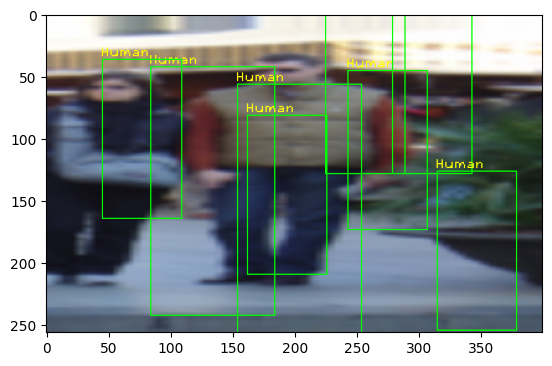

In [35]:
import numpy as np
import cv2,joblib
from imutils.object_detection import non_max_suppression
import imutils
from skimage.feature import hog
from skimage import color
from skimage.transform import pyramid_gaussian

filename = "../Datasets/DATAIMAGE/positive/crop001003c.png"

image = cv2.imread(filename)
image = cv2.resize(image,(400,256))
size = (64,128)
step_size = (9,9)
downscale = 1.25
#List to store the detections
detections = []
#The current scale of the image
scale = 0
model = joblib.load('models.dat')

def sliding_window(image, window_size, step_size):
    for y in range(0, image.shape[0], step_size[1]):
        for x in range(0, image.shape[1], step_size[0]):
            yield (x, y, image[y: y + window_size[1], x: x + window_size[0]])

for im_scaled in pyramid_gaussian(image, downscale = downscale):
    #The list contains detections at the current scale
    if im_scaled.shape[0] < size[1] or im_scaled.shape[1] < size[0]:
        break
    for (x, y, window) in sliding_window(im_scaled, size, step_size):
        if window.shape[0] != size[1] or window.shape[1] != size[0]:
            continue
        window = color.rgb2gray(window)

        fd=hog(window, orientations=9,pixels_per_cell=(8,8),visualize=False,cells_per_block=(3,3))
        fd = fd.reshape(1, -1)
        pred = model.predict(fd)
        if pred == 1:

            if model.decision_function(fd) > 0.5:
                detections.append((int(x * (downscale**scale)), int(y * (downscale**scale)), model.decision_function(fd),
                int(size[0] * (downscale**scale)),
                int(size[1] * (downscale**scale))))

    scale += 1
clone = image.copy()
clone = cv2.cvtColor(clone,cv2.COLOR_BGR2RGB)
rects = np.array([[x, y, x + w, y + h] for (x, y, _, w, h) in detections])
sc = [score[0] for (x, y, score, w, h) in detections]
print ("sc: ", sc)
sc = np.array(sc)
pick = non_max_suppression(rects, probs = sc, overlapThresh = 0.5)
for(x1, y1, x2, y2) in pick:
    cv2.rectangle(clone, (x1, y1), (x2, y2), (0, 255, 0))
    cv2.putText(clone,'Human',(x1-2,y1-2),1,0.75,(255,255,0),1)

plt.imshow(clone)

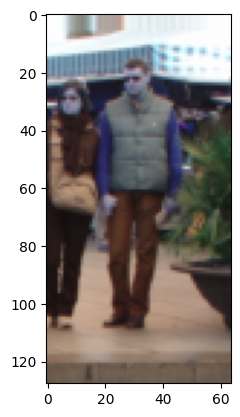

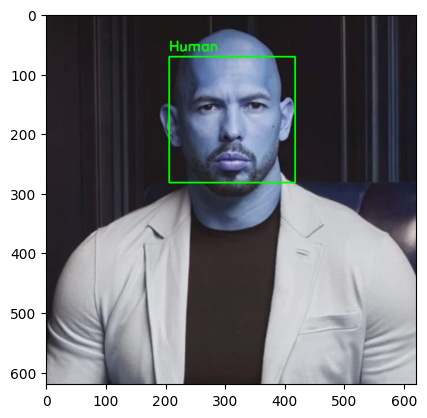

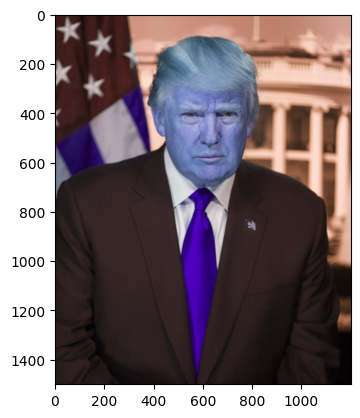

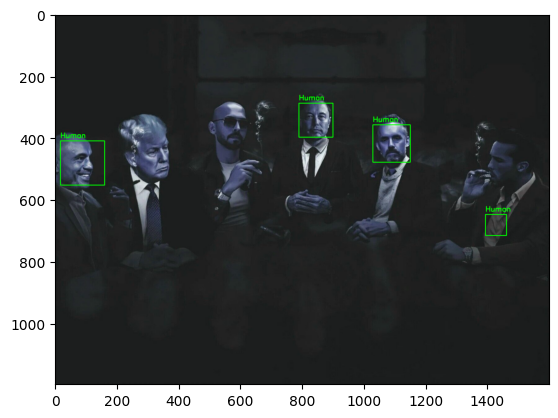

In [42]:
face_cascade = cv2.CascadeClassifier("../Datasets/haarcascades/haarcascade_frontalface_default.xml")

def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)

    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(face_img, 'Human', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

    return face_img

img1 = cv2.imread("../Datasets/DATAIMAGE/positive/crop001003c.png")

result1 = detect_face(img1)
plt.imshow(result1, cmap='gray')
plt.show()


topg = cv2.imread("../Images/topg_potrait.webp")
result1 = detect_face(topg)
plt.imshow(result1, cmap='gray')
plt.show()


trump = cv2.imread("../Images/trump_potrait.jpg")
result2 = detect_face(trump)
plt.imshow(result2, cmap='gray')
plt.show()


escape_the_matrix = cv2.imread("../Images/escape_the_matrix.jpg")
result3 = detect_face(escape_the_matrix)
plt.imshow(result3, cmap='gray')
plt.show()

In [ ]:
import cv2
import joblib
from imutils.object_detection import non_max_suppression
from skimage.feature import hog
from skimage import color

filename = "../Datasets/DATAIMAGE/positive/crop001003c.png"

# Load the image
image = cv2.imread(filename)

# Define the maximum size for the longer side of the image
max_longer_side = 800

# List of parameter values to try
window_sizes = [(64, 128), (96, 192), (128, 256)]
step_sizes = [(8, 8), (12, 12), (16, 16)]
downscales = [1.1, 1.2, 1.3]
overlap_thresholds = [0.3, 0.5, 0.7]
confidence_thresholds = [0.3, 0.5, 0.7]

best_accuracy = 0.0
best_params = None

# Perform grid search over parameter combinations
for size in window_sizes:
    for step_size in step_sizes:
        for downscale in downscales:
            for overlap_thresh in overlap_thresholds:
                for confidence_thresh in confidence_thresholds:
                    # Your existing code here to perform human detection using the current parameter values
                    # ...

                    # Evaluate the accuracy of the human detection
                    # For example, you can compare the detected bounding boxes with ground truth annotations if available
                    accuracy = compute_accuracy(detected_boxes, ground_truth_boxes)

                    # Print the current parameter combination and its accuracy
                    print(f"Parameters: window_size={size}, step_size={step_size}, downscale={downscale}, "
                          f"overlap_thresh={overlap_thresh}, confidence_thresh={confidence_thresh}")
                    print(f"Accuracy: {accuracy}")

                    # Keep track of the best parameter combination
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = (size, step_size, downscale, overlap_thresh, confidence_thresh)

# After the grid search is completed, print the best parameter combination and its accuracy
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)
